# Dependent variable
## all_deals.dta

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load data
datadir = 'data'
data = pd.read_stata(datadir+"/all_deals.dta")
data["dealdate"] = pd.to_datetime(data.dealdate)

In [3]:
print(data.shape)
data.head()

(72797, 45)


,portfoliocompanyid,website,dealid,portfoliocompany,background,investorsbuyersfirms,portfoliocompanycountry,dealdescription,stage,dealdate,...,dealsizeeurmn,acquiredshare,financialadvisorsbuyers,financialadvisorssellers,legaladvisorsbuyers,legaladvisorssellers,has_no_background,incyear,_merge,has_website
0,26178,www.barracuda.com,V114584,"Barracuda Networks, Inc.","Founded in 2002 and based in California, Unite...",Focus Ventures,US,"In September 2006, Barracuda Networks, Inc. ra...",Series D/Round 4,2006-09-26,...,NaN,NaN,,,,,0,2002,matched (3),1
1,26580,www.fleetcor.com,V18681,"FleetCor Technologies, Inc.","Founded in 2000 and based in Georgia, US, Flee...",Bain Capital,US,"In June 2005, FleetCor Technologies raised USD...",Series D/Round 4,2005-06-01,...,67.33,NaN,,,,,0,2000,matched (3),1
2,26635,www.leafgroup.com,V4520,Leaf Group Ltd.,"Founded in 2006 and based in California, US, L...","Oak Investment Partners, Generation Partners, ...",US,"In March 2008, returning investors 3i, Generat...",Series D/Round 4,2008-03-24,...,31.42,NaN,,,,,0,2006,matched (3),1
3,26957,www.sawayasegalas.com,V9012,Sawaya Segalas & Co.,"Founded in 2001 and based in New York, United ...","VOSS of Norway ASA, Centra Capital, Juggernaut...",US,"In August 2011, Sawaya Segalas & Co. raised US...",Growth Capital/Expansion,2011-08-03,...,16.16,NaN,,,,,0,2001,matched (3),1
4,28167,www.activeinterestmedia.com,V213946,Active Interest Media Inc.,"Founded in 2003 and based in Colorado, US, Act...","Pocket Outdoor Media, Inc., Zone 5 Ventures",US,"In June 2020, Pocket Outdoor Media, Inc., a po...",Add-on,2020-06-30,...,NaN,NaN,,,,,0,2003,matched (3),1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72797 entries, 0 to 72796
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   portfoliocompanyid           72797 non-null  int32         
 1   website                      72797 non-null  object        
 2   dealid                       72797 non-null  object        
 3   portfoliocompany             72797 non-null  object        
 4   background                   72797 non-null  object        
 5   investorsbuyersfirms         72797 non-null  object        
 6   portfoliocompanycountry      72797 non-null  object        
 7   dealdescription              72797 non-null  object        
 8   stage                        72797 non-null  object        
 9   dealdate                     72785 non-null  datetime64[ns]
 10  dealcurrency                 72797 non-null  object        
 11  dealsizecurrmn               59675 non-nu

In [6]:
data.dealdate.min(),data.dealdate.max()

(Timestamp('1987-06-16 00:00:00'), Timestamp('2020-07-23 00:00:00'))

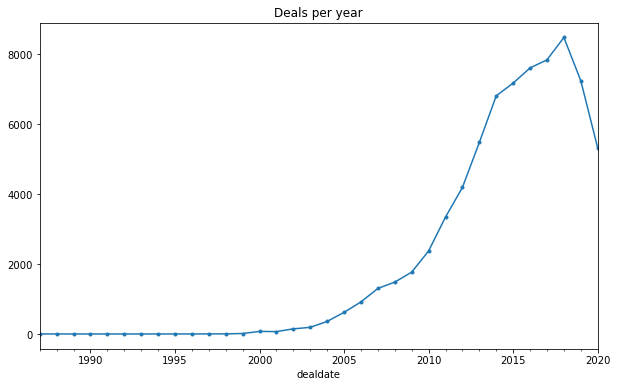

In [7]:
d = data.groupby("dealdate").portfoliocompanyid.count()
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Deals per year")
d.resample("Y").sum().plot(kind="line",style=".-");

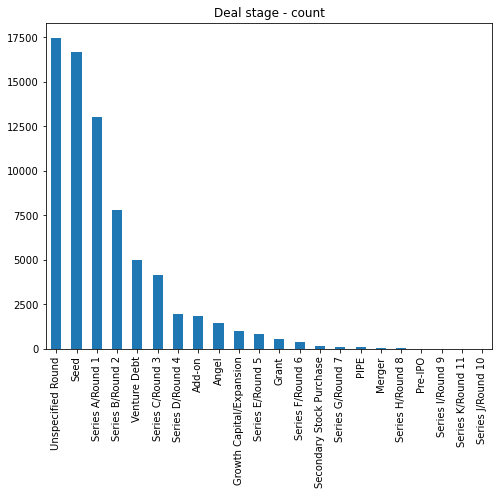

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title("Deal stage - count")
data.stage.value_counts().plot(kind="bar",ax=ax);

The 99th percentile is 209


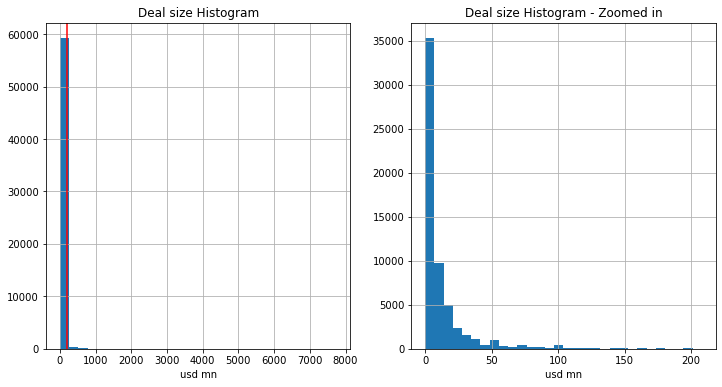

In [9]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
data.dealsizeusdmn.hist(bins=30,ax=ax[0])
per = data.dealsizeusdmn.quantile(0.99)
ax[0].axvline(per,color="red")
ax[0].set_title("Deal size Histogram")
ax[0].set_xlabel("usd mn")
print(f"The 99th percentile is {round(per)}")
ax[1].set_title("Deal size Histogram - Zoomed in")
ax[1].set_xlabel("usd mn")
data[data.dealsizeusdmn<=per].dealsizeusdmn.hist(bins=30,ax=ax[1]);

In [10]:
d1 = data[data.stage=="Seed"].groupby("portfoliocompanyid").dealsizeusdmn.sum()
first_rounds =["Seed","Series A/Round 1","Series B/Round 2","Series C/Round 3","Series D/Round 4"]
d2 = data[data.stage.isin(first_rounds)].groupby("portfoliocompanyid").dealsizeusdmn.sum()

In [11]:
y_vars = data.groupby("portfoliocompanyid").agg({"portfoliocompanyid":"count","dealsizeusdmn":"sum"})
y_vars.columns = ["dealcounts","dealsizeusdmn"]
y_vars["seed_founding"] = y_vars.index.map(d1).fillna(0)
y_vars["firstrounds_founding"] = y_vars.index.map(d2).fillna(0)
y_vars

,dealcounts,dealsizeusdmn,seed_founding,firstrounds_founding
portfoliocompanyid,,,,
26178,8,351.22,0.00,80.00
26580,16,812.00,0.00,292.00
26635,8,710.00,0.00,710.00
26957,1,18.00,0.00,0.00
28167,1,0.00,0.00,0.00
...,...,...,...,...
384356,1,10.00,10.00,10.00
384360,2,0.15,0.15,0.15
384390,1,0.00,0.00,0.00


The 99th percentile is 996


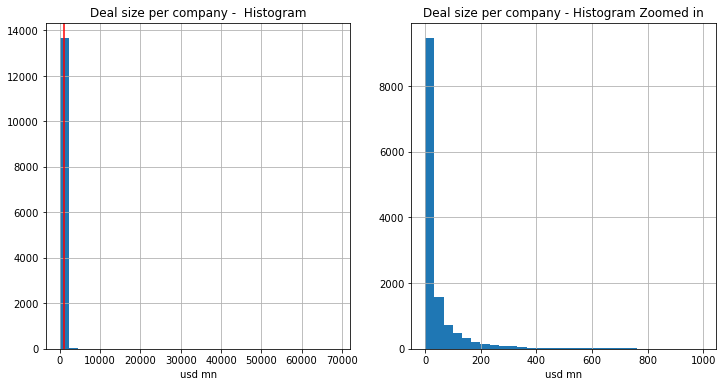

In [12]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
y_vars.dealsizeusdmn.hist(bins=30,ax=ax[0])
per = y_vars.dealsizeusdmn.quantile(0.99)
ax[0].axvline(per,color="red")
ax[0].set_title("Deal size per company -  Histogram")
ax[0].set_xlabel("usd mn")
print(f"The 99th percentile is {round(per)}")
ax[1].set_title("Deal size per company - Histogram Zoomed in")
ax[1].set_xlabel("usd mn")
y_vars[y_vars.dealsizeusdmn<=per].dealsizeusdmn.hist(bins=30,ax=ax[1]);

The 99th percentile is 19


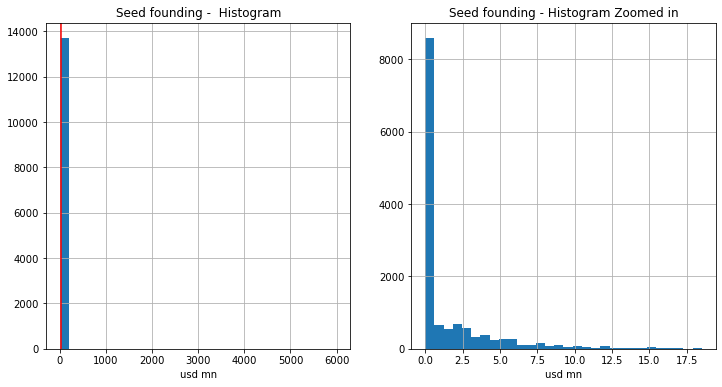

In [13]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
y_vars.seed_founding.hist(bins=30,ax=ax[0])
per = y_vars.seed_founding.quantile(0.99)
ax[0].axvline(per,color="red")
ax[0].set_title("Seed founding -  Histogram")
ax[0].set_xlabel("usd mn")
print(f"The 99th percentile is {round(per)}")
ax[1].set_title("Seed founding - Histogram Zoomed in")
ax[1].set_xlabel("usd mn")
y_vars[y_vars.seed_founding<=per].seed_founding.hist(bins=30,ax=ax[1]);

The 99th percentile is 455


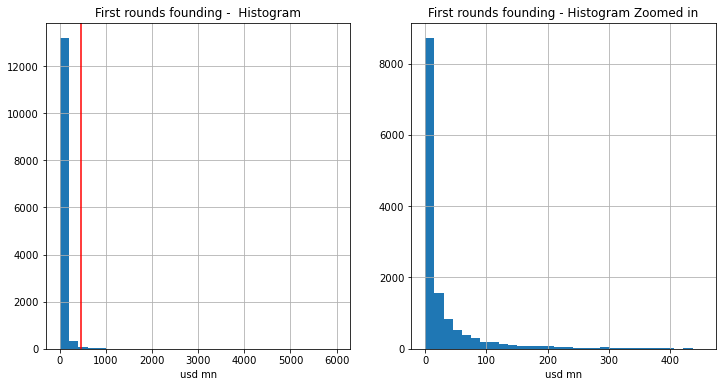

In [14]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
y_vars.firstrounds_founding.hist(bins=30,ax=ax[0])
per = y_vars.firstrounds_founding.quantile(0.99)
ax[0].axvline(per,color="red")
ax[0].set_title("First rounds founding -  Histogram")
ax[0].set_xlabel("usd mn")
print(f"The 99th percentile is {round(per)}")
ax[1].set_title("First rounds founding - Histogram Zoomed in")
ax[1].set_xlabel("usd mn")
y_vars[y_vars.firstrounds_founding<=per].firstrounds_founding.hist(bins=30,ax=ax[1]);

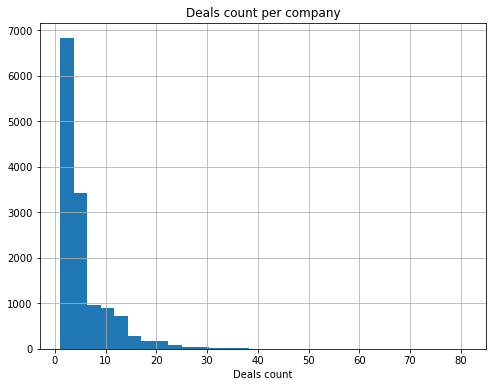

In [15]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.set_title("Deals count per company")
ax.set_xlabel("Deals count")
y_vars.dealcounts.hist(bins=30,ax=ax);

## Preqin: Venture deals Analyst - Exits

In [16]:
df = pd.read_csv(datadir+"/preqin_exits.csv")
print(df.shape)
df.head()

(11320, 23)


,Venture_Exit_ID,Venture_ID,PortFirm_ID,Portfolio Company Name,Website,Initial Investment Date,Latest Investment Date,Stages,Total Known Funding (USD mn),Total Known Funding (EUR mn),...,Exit Value (mn),Exit Value (USDmn),Exit Value (EURmn),Acquiror (Exit),VC Industry Classification,Primary Industry,Sub-Industries,Location,Region,Partially Exited
0,7695,25439,92396,#waywire,www.waywire.com,30-Jun-12,30-Jun-12,"Seed, Add-on",1.75,1.43,...,NaN,NaN,NaN,Waywire Enterprise,Internet,Internet,"Multimedia & Graphics, Social Networking & Com...",US,North America,0
1,19373,149117,280594,@Motion Inc.,NaN,6-Apr-98,6-Jul-99,"Series A/Round 1, Unspecified Round",10.00,9.70,...,NaN,NaN,NaN,Unwired Planet,Telecoms,Telecoms,"Integrated Telecoms Services, Wireless Telecom...",US,North America,0
2,19338,148553,279351,"@Road, Inc.",www.atroad.com,15-Jul-94,15-Jul-00,"Series A/Round 1, Series B/Round 2, Series C/...",51.00,53.33,...,63.00 USD,63.0,71.29,NaN,Software & Related,Software,"Wireless, Analytics & Performance Software, Co...",US,North America,1
3,19339,148553,279351,"@Road, Inc.",www.atroad.com,15-Jul-94,15-Jul-00,"Series A/Round 1, Series B/Round 2, Series C/...",51.00,53.33,...,496.00 USD,496.0,375.84,Trimble Navigation Limited,Software & Related,Software,"Wireless, Analytics & Performance Software, Co...",US,North America,0
4,16832,127885,241333,"@stake, Inc.",NaN,7-Jan-00,7-Jan-00,Unspecified Round,10.00,9.93,...,NaN,NaN,NaN,NortonLifeLock Inc,Other IT,IT Security,Consulting Services,US,North America,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11320 entries, 0 to 11319
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Venture_Exit_ID               11320 non-null  int64  
 1   Venture_ID                    11320 non-null  int64  
 2   PortFirm_ID                   11320 non-null  int64  
 3   Portfolio Company Name        11320 non-null  object 
 4   Website                       9236 non-null   object 
 5   Initial Investment Date       11246 non-null  object 
 6   Latest Investment Date        11246 non-null  object 
 7   Stages                        11320 non-null  object 
 8   Total Known Funding (USD mn)  10242 non-null  float64
 9   Total Known Funding (EUR mn)  10242 non-null  float64
 10  Investors                     10952 non-null  object 
 11  Exit Date                     11262 non-null  object 
 12  Exit Type                     11320 non-null  object 
 13  E

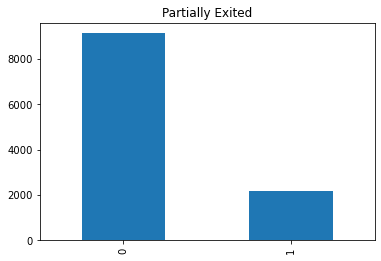

In [18]:
df["Partially Exited"].value_counts().plot(kind="bar");
plt.gca().set_title("Partially Exited");

What does "Partially Exited" means?

In [19]:
df["Exit Type"].value_counts()

Trade Sale            8425
IPO                   1354
Sale to GP             612
Merger                 472
Private Placement      282
Restructuring          123
Recapitalisation        27
Sale to Management      25
Name: Exit Type, dtype: int64

In [20]:
print("Exit types for partially exited==1:")
df[df["Partially Exited"]==1]["Exit Type"].value_counts()

Exit types for partially exited==1:


IPO                   1008
Trade Sale             528
Private Placement      235
Merger                 201
Sale to GP             186
Restructuring           14
Recapitalisation        11
Sale to Management       7
Name: Exit Type, dtype: int64

In [21]:
df[(df["Partially Exited"]==1) ].groupby("PortFirm_ID").PortFirm_ID.count().value_counts()

1     1546
2      179
3       46
4       15
5        6
7        4
6        2
10       1
8        1
Name: PortFirm_ID, dtype: int64

In [22]:
df[( df["Exit Type"]=="IPO")].groupby("PortFirm_ID").PortFirm_ID.count().value_counts()

1    1326
2      14
Name: PortFirm_ID, dtype: int64

In [23]:
df[(df["Partially Exited"]==1) & (df["Exit Type"]=="IPO")].groupby("PortFirm_ID").PortFirm_ID.count().value_counts()

1    994
2      7
Name: PortFirm_ID, dtype: int64

In [24]:
# Has IPO
d3 = df[df["Exit Type"]=="IPO"].groupby("PortFirm_ID").PortFirm_ID.count().map(lambda x: 1)
# IPO value
d4 = df[df["Exit Type"]=="IPO"].groupby("PortFirm_ID")["Exit Value (USDmn)"].sum()
# Exit value
d5 = df.groupby("PortFirm_ID")["Exit Value (USDmn)"].sum()
# Exit value v2
d6 = df[df["Partially Exited"]==1].groupby("PortFirm_ID")["Exit Value (USDmn)"].sum()

In [25]:
y_vars["has_ipo"] = y_vars.index.map(d3).fillna(0)
y_vars["ipo_value"] = y_vars.index.map(d4).fillna(0)
y_vars["exit_value"] = y_vars.index.map(d5).fillna(0)
y_vars["exit_value_partiallyexited"] = y_vars.index.map(d6).fillna(0)

In [26]:
y_vars

,dealcounts,dealsizeusdmn,seed_founding,firstrounds_founding,has_ipo,ipo_value,exit_value,exit_value_partiallyexited
portfoliocompanyid,,,,,,,,
26178,8,351.22,0.00,80.00,1.0,74.52,1674.52,74.52
26580,16,812.00,0.00,292.00,1.0,292.10,491.95,491.95
26635,8,710.00,0.00,710.00,1.0,151.30,151.30,151.30
26957,1,18.00,0.00,0.00,0.0,0.00,0.00,0.00
28167,1,0.00,0.00,0.00,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
384356,1,10.00,10.00,10.00,0.0,0.00,0.00,0.00
384360,2,0.15,0.15,0.15,0.0,0.00,0.00,0.00
384390,1,0.00,0.00,0.00,0.0,0.00,0.00,0.00


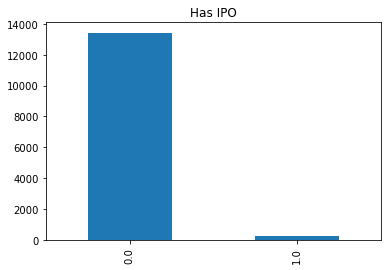

In [27]:
y_vars.has_ipo.value_counts().plot(kind="bar");
plt.gca().set_title("Has IPO");

The 99th percentile is 3667


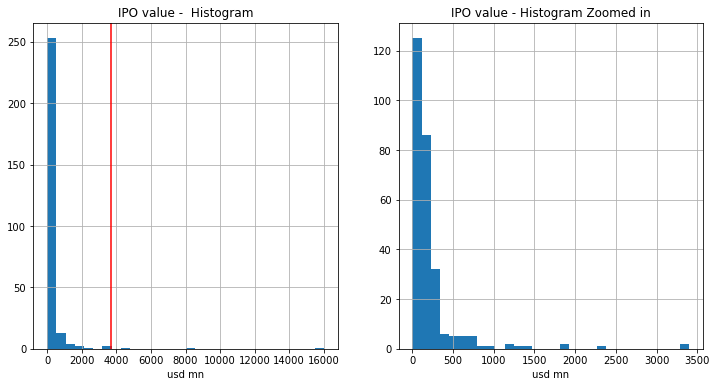

In [28]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
y_vars[y_vars.has_ipo==1].ipo_value.hist(bins=30,ax=ax[0])
per = y_vars[y_vars.has_ipo==1].ipo_value.quantile(0.99)
ax[0].axvline(per,color="red")
ax[0].set_title("IPO value -  Histogram")
ax[0].set_xlabel("usd mn")
print(f"The 99th percentile is {round(per)}")
ax[1].set_title("IPO value - Histogram Zoomed in")
ax[1].set_xlabel("usd mn")
y_vars[(y_vars.has_ipo==1) & (y_vars.ipo_value<=per)].ipo_value.hist(bins=30,ax=ax[1]);

The 99th percentile is 4023


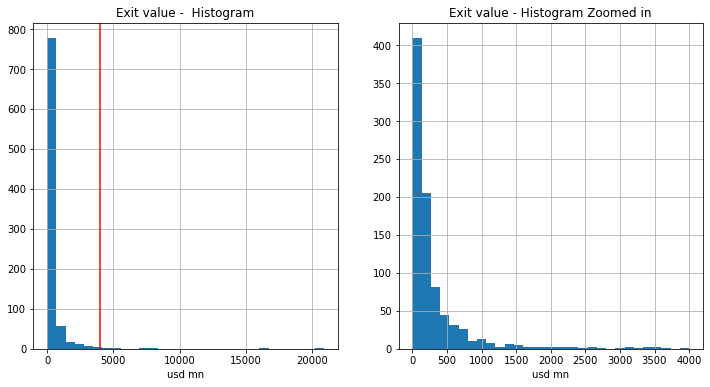

In [29]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
y_vars[y_vars.exit_value>0].exit_value.hist(bins=30,ax=ax[0])
per = y_vars[y_vars.exit_value>0].exit_value.quantile(0.99)
ax[0].axvline(per,color="red")
ax[0].set_title("Exit value -  Histogram")
ax[0].set_xlabel("usd mn")
print(f"The 99th percentile is {round(per)}")
ax[1].set_title("Exit value - Histogram Zoomed in")
ax[1].set_xlabel("usd mn")
y_vars[(y_vars.exit_value>0) & (y_vars.exit_value<=per)].exit_value.hist(bins=30,ax=ax[1]);

Exit value v2: Deals where partially exited==1
The 99th percentile is 3399


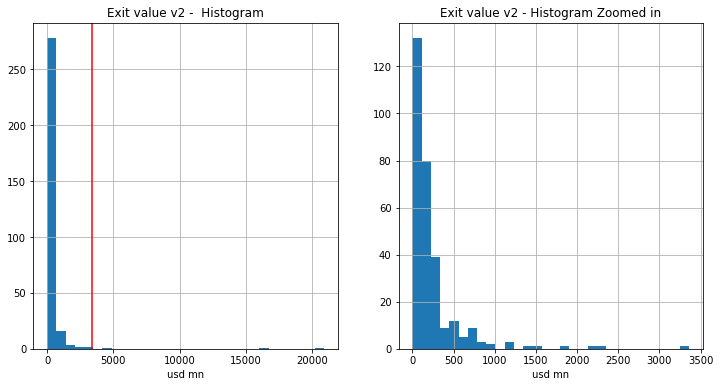

In [30]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
y_vars[y_vars.exit_value_partiallyexited>0].exit_value_partiallyexited.hist(bins=30,ax=ax[0])
per = y_vars[y_vars.exit_value_partiallyexited>0].exit_value_partiallyexited.quantile(0.99)
ax[0].axvline(per,color="red")
ax[0].set_title("Exit value v2 -  Histogram")
ax[0].set_xlabel("usd mn")
print("Exit value v2: Deals where partially exited==1")
print(f"The 99th percentile is {round(per)}")
ax[1].set_title("Exit value v2 - Histogram Zoomed in")
ax[1].set_xlabel("usd mn")
y_vars[(y_vars.exit_value_partiallyexited>0) & (y_vars.exit_value_partiallyexited<=per)].exit_value_partiallyexited.hist(bins=30,ax=ax[1]);

In [31]:
y_vars

,dealcounts,dealsizeusdmn,seed_founding,firstrounds_founding,has_ipo,ipo_value,exit_value,exit_value_partiallyexited
portfoliocompanyid,,,,,,,,
26178,8,351.22,0.00,80.00,1.0,74.52,1674.52,74.52
26580,16,812.00,0.00,292.00,1.0,292.10,491.95,491.95
26635,8,710.00,0.00,710.00,1.0,151.30,151.30,151.30
26957,1,18.00,0.00,0.00,0.0,0.00,0.00,0.00
28167,1,0.00,0.00,0.00,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
384356,1,10.00,10.00,10.00,0.0,0.00,0.00,0.00
384360,2,0.15,0.15,0.15,0.0,0.00,0.00,0.00
384390,1,0.00,0.00,0.00,0.0,0.00,0.00,0.00


In [32]:
# y_vars.to_csv(datadir+"/y_vars.csv")